In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf
import yfinance as yf
import math
import time 

import os
from os import listdir
from os.path import isfile, join

from Py_for_Finance_02_2V import get_df_from_csv
from Py_for_Finance_03 import get_valid_dates
from Py_for_Finance_03 import roi_between_dates
from Py_for_Finance_03 import merge_df_by_column_name
%store -r tickers

risk_free_rate = 0.0125



# Functions that returns a dataframe from a csv

In [25]:
PATH = '/Users/m1852/python/Python For Finance Youtube/stock/'

def get_df_from_csv(ticker):
    try: 
        df = pd.read_csv(PATH + ticker +'.csv', index_col = 'Date', parse_dates = True)
    except FileNotFoundError: 
        pass
    else: 
        return df

In [26]:
aapl = get_df_from_csv('AAPL')
aapl

,Unnamed: 0,Adj Close,daily_return
Date,,,
2017-01-03,0,27.059311,NaN
2017-01-04,1,27.029016,-0.001120
2017-01-05,2,27.166473,0.005086
2017-01-06,3,27.469330,0.011148
2017-01-09,4,27.720936,0.009160
...,...,...,...
2021-08-12,1160,147.187164,0.020773
2021-08-13,1161,147.394760,0.001410
2021-08-16,1162,149.391678,0.013548


# Merge Multiple Stocks in One DataFrame by Column Name

In [38]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    mult_df = pd.DataFrame()
    for x in tickers: 
        df = get_df_from_csv(x)
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
    return mult_df

# Markowitz Portfolio Optimization

# Plotting an efficient frontier

In [46]:
port_list = ['GNRC',
 'DXCM',
 'GOOG',
 'NFLX',
 'EL',
 'TSLA',
 'AES',
 'MSCI',
 'SHW',
 'SBAC',
 'HES'
]

In [47]:
mult_df = merge_df_by_column_name('Adj Close', '2018-01-01', '2021-09-01', *port_list)
mult_df.to_csv('/Users/m1852/python/Python For Finance Youtube/stock_port.csv')
mult_df

,GNRC,DXCM,GOOG,NFLX,EL,TSLA,AES,MSCI,SHW,SBAC,HES
Date,,,,,,,,,,,
2018-01-02,48.029999,14.497500,53.250000,201.070007,120.772995,21.368668,8.989431,120.650925,130.969818,154.803757,43.629612
2018-01-03,49.730000,14.520000,54.124001,205.050003,122.694557,21.150000,8.981168,122.484116,131.495346,156.740875,45.042912
2018-01-04,50.070000,13.062500,54.320000,205.630005,123.271957,20.974667,8.948119,124.411819,130.779877,155.883133,46.127949
2018-01-05,50.410000,13.315000,55.111500,209.990005,123.044792,21.105333,8.981168,125.706352,133.489822,156.962463,47.559467
2018-01-08,49.529999,13.860000,55.347000,212.050003,123.972427,22.427334,8.981168,125.876511,134.230576,156.981796,47.860367
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-12,423.320007,123.212502,138.389496,510.720001,319.180756,240.750000,23.505861,613.280212,297.519745,342.145874,69.958809
2021-08-13,414.100006,122.852501,138.406006,515.919983,319.004944,239.056671,23.206301,618.047852,299.430054,345.653137,67.966660
2021-08-16,410.190002,126.544998,138.916000,517.919983,320.352905,228.723328,22.803772,618.234192,301.487244,344.324463,65.556625


# Plot Growth of Investment over Tptal Assets

<Axes: xlabel='Date'>

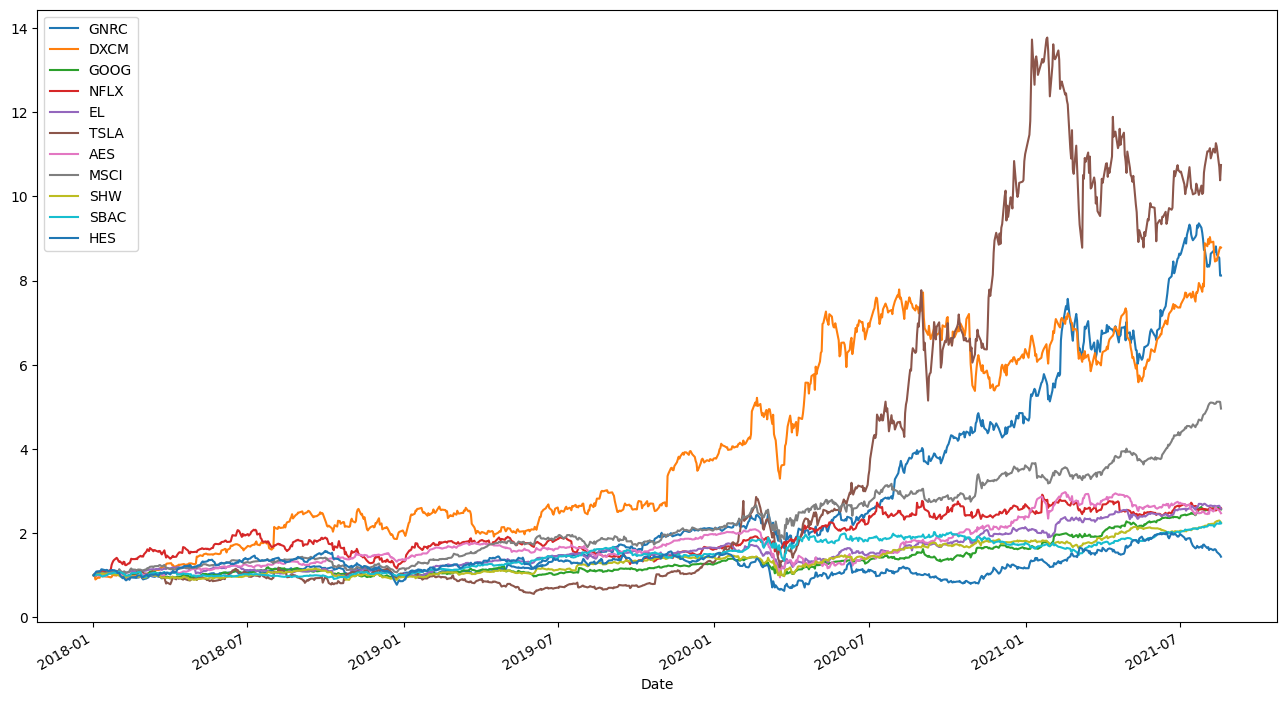

In [48]:
(mult_df / mult_df.iloc[0]).plot(figsize = (16,9))

# Mean Returns: note the log return

In [49]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252
mean_ret

GNRC    0.578095
DXCM    0.599842
GOOG    0.259960
NFLX    0.263252
EL      0.261660
TSLA    0.655445
AES     0.250051
MSCI    0.442095
SHW     0.224100
SBAC    0.221590
HES     0.101027
dtype: float64

# Covariance

In [50]:
returns.cov()

,GNRC,DXCM,GOOG,NFLX,EL,TSLA,AES,MSCI,SHW,SBAC,HES
GNRC,0.000632,0.000241,0.000222,0.000206,0.000196,0.000348,0.000262,0.000272,0.000234,0.000171,0.000320
DXCM,0.000241,0.000941,0.000226,0.000257,0.000167,0.000380,0.000175,0.000323,0.000198,0.000146,0.000231
GOOG,0.000222,0.000226,0.000353,0.000266,0.000190,0.000300,0.000180,0.000256,0.000184,0.000131,0.000278
NFLX,0.000206,0.000257,0.000266,0.000676,0.000157,0.000383,0.000129,0.000256,0.000158,0.000109,0.000173
EL,0.000196,0.000167,0.000190,0.000157,0.000386,0.000221,0.000195,0.000193,0.000176,0.000130,0.000278
TSLA,0.000348,0.000380,0.000300,0.000383,0.000221,0.001734,0.000297,0.000345,0.000254,0.000141,0.000325
AES,0.000262,0.000175,0.000180,0.000129,0.000195,0.000297,0.000576,0.000248,0.000196,0.000134,0.000373
MSCI,0.000272,0.000323,0.000256,0.000256,0.000193,0.000345,0.000248,0.000487,0.000227,0.000193,0.000278
SHW,0.000234,0.000198,0.000184,0.000158,0.000176,0.000254,0.000196,0.000227,0.000338,0.000160,0.000208
SBAC,0.000171,0.000146,0.000131,0.000109,0.000130,0.000141,0.000134,0.000193,0.000160,0.000324,0.000138


# Correlation

In [51]:
returns.corr()

,GNRC,DXCM,GOOG,NFLX,EL,TSLA,AES,MSCI,SHW,SBAC,HES
GNRC,1.000000,0.312496,0.469904,0.314849,0.397226,0.332263,0.434057,0.489983,0.506565,0.377590,0.371110
DXCM,0.312496,1.000000,0.392044,0.322158,0.277690,0.297855,0.237280,0.477400,0.350352,0.264791,0.219261
GOOG,0.469904,0.392044,1.000000,0.544829,0.516027,0.383988,0.399463,0.617156,0.533898,0.387152,0.432182
NFLX,0.314849,0.322158,0.544829,1.000000,0.306937,0.353593,0.206513,0.446502,0.330213,0.231871,0.193627
EL,0.397226,0.277690,0.516027,0.306937,1.000000,0.270416,0.412602,0.444655,0.486372,0.367141,0.412041
TSLA,0.332263,0.297855,0.383988,0.353593,0.270416,1.000000,0.296623,0.375312,0.331701,0.188551,0.227566
AES,0.434057,0.237280,0.399463,0.206513,0.412602,0.296623,1.000000,0.468171,0.444838,0.309001,0.453010
MSCI,0.489983,0.477400,0.617156,0.446502,0.444655,0.375312,0.468171,1.000000,0.559655,0.485189,0.367000
SHW,0.506565,0.350352,0.533898,0.330213,0.486372,0.331701,0.444838,0.559655,1.000000,0.482990,0.330248
SBAC,0.377590,0.264791,0.387152,0.231871,0.367141,0.188551,0.309001,0.485189,0.482990,1.000000,0.224092


# Generate random weights equal to 1

In [53]:
weights = np.random.random(11)
weights /= np.sum(weights)
print('Weights: ', weights)
print('Total Weights: ', np.sum(weights))

Weights:  [0.12154716 0.001298   0.14486429 0.12094549 0.05412894 0.1279473
 0.13265435 0.01240997 0.11292565 0.08996963 0.08130921]
Total Weights:  1.0000000000000002


# Calculating retunr of portfolio

In [54]:
np.sum(weights * returns.mean()) * 252

0.33068246263561146

# Calculating Volatility

In [55]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.26564719009593635

# Analyzing Returns & Risks of 10000 Combinations

In [56]:
p_ret = []
p_vol = []
p_SR = []
p_wt = []

for x in range(10000): 
    p_weights = np.random.random(11)
    p_weights /= np.sum(p_weights)

    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)

    vol_1 = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)

    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)

    p_wt.append(p_weights)

p_ret = np. array(p_ret)
p_vol = np. array(p_vol)
p_SR = np. array(p_SR)
p_wt = np. array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.32489278, 0.2964014 , 0.35563841, ..., 0.31907792, 0.34952927,
        0.29458619]),
 array([0.25409953, 0.25396832, 0.2659691 , ..., 0.25983305, 0.25969599,
        0.253751  ]),
 array([1.22941112, 1.11786147, 1.2901439 , ..., 1.17990344, 1.29778387,
        1.11166537]),
 array([[0.14310627, 0.10245183, 0.15196274, ..., 0.13154775, 0.04895538,
         0.11744097],
        [0.10101074, 0.01558109, 0.16057393, ..., 0.1606165 , 0.03988176,
         0.11254726],
        [0.10714745, 0.04745971, 0.05436482, ..., 0.13106301, 0.07495331,
         0.12825968],
        ...,
        [0.09759283, 0.0237218 , 0.10230456, ..., 0.13684005, 0.09713047,
         0.12316094],
        [0.12019032, 0.09038242, 0.07776391, ..., 0.00545979, 0.1165676 ,
         0.13523546],
        [0.02155655, 0.0033279 , 0.1322109 , ..., 0.1224819 , 0.12533274,
         0.06068032]]))

# Plotting the Efficient Frontier

<Axes: xlabel='Volatility', ylabel='Return'>

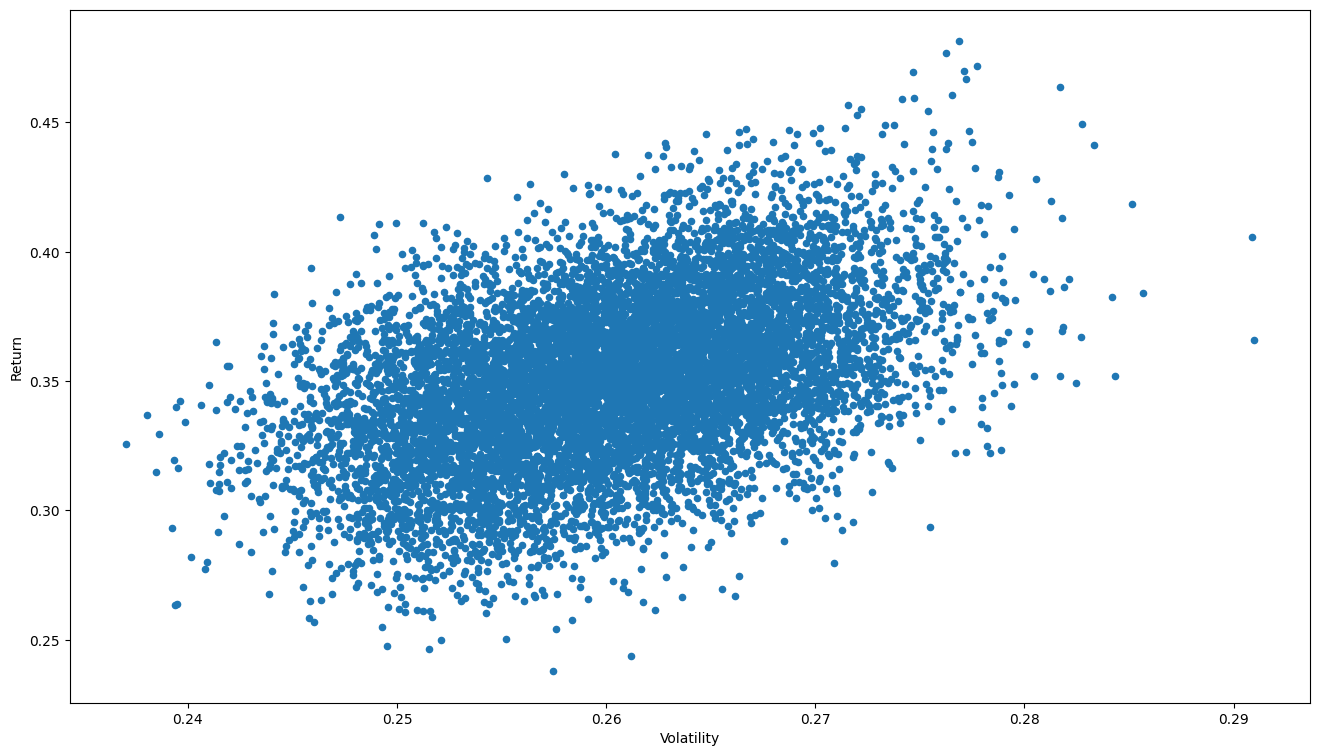

In [58]:
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})
ports.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (16, 9)) 

# Sharp Ratio

In [61]:
SR_idx = np.argmax(p_SR)
i = 0
while i < 11: 
    print('Stock: %s: %2.2f' % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1
print("\nVolatility: ", p_vol[SR_idx])
print("\nReturn: ", p_ret[SR_idx])



Stock: GNRC: 17.79
Stock: DXCM: 19.17
Stock: GOOG: 0.33
Stock: NFLX: 4.79
Stock: EL: 3.02
Stock: TSLA: 21.44
Stock: AES: 2.01
Stock: MSCI: 16.02
Stock: SHW: 1.28
Stock: SBAC: 7.19
Stock: HES: 6.96

Volatility:  0.27689104528620423

Return:  0.48140590814466255


In [73]:
def get_port_shares(one_price, force_one, wts, prices):
    num_stocks = len(wts)
    shares = []
    cost_shares = []

    i = 0
    while i < num_stocks: 
        max_price = one_price * wts[i]
        num_shares = int(max_price / prices[i])
        if(force_one & (num_shares == 0)):
            num_shares = 1
        shares.append(num_shares)
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
    return shares, cost_shares

# Get Portfolio Weighting

In [68]:
def get_port_weighting(share_cost):
    stock_wts = []
    tot_val = sum(share_cost)
    print("Total Investment: ", tot_val)

    for x in share_cost: 
        stock_wts.append(x / tot_val)
    return stock_wts

# Approximate Portfolio Weighting Based on Request

In [74]:

port_wts = [18, 19, 1, 5, 3, 22, 2, 16, 2, 7, 7]

port_df_start = merge_df_by_column_name('Adj Close', '2020-01-02', '2020-01-02', *port_list)

port_prices = port_df_start.values.tolist()
port_prices = sum(port_prices, [])

tot_shares, share_cost = get_port_shares(118.2, True, port_wts, port_prices)
print('Shares: ', tot_shares)
print('Share Cost: ', share_cost)

stock_wts = get_port_weighting(share_cost)
print('Stock Weights: ', stock_wts)

Shares:  [20, 40, 1, 1, 1, 90, 13, 7, 1, 3, 12]
Share Cost:  [2040.2000427246096, 2193.800048828125, 68.36849975585938, 329.8099975585937, 199.3699645996093, 2581.560001373291, 231.39716339111328, 1802.6704711914058, 184.2825469970703, 692.6511383056641, 766.8939971923828]
Total Investment:  11091.003871917725
Stock Weights:  [0.18395089085581956, 0.19779995338229012, 0.006164320249582413, 0.02973671286813525, 0.017975826796383276, 0.2327616175402992, 0.020863500370512704, 0.1625344731648452, 0.016615497490147964, 0.06245161811361798, 0.06914558916836629]
